In [1]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pandas import DataFrame
import sklearn
from pandas import DataFrame
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
svm=LinearSVC()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
gnb=GaussianNB()
import matplotlib as mt

In [2]:
dataset=pd.read_csv("segregated3.csv")
print(dataset.columns)
import pandas as pd

dataset['Formation boolean']
# the dataset is established in the code

Index(['Cohesive energy', 'Melting point', 'Pauling', 'Mulliken', 'ENTROPY',
       'Min radius', 'Pseudopotential', 'Atomic mismatch', 'VEC', 'Density',
       'Volume', 'Average mass', 'Covalent radius(pm)', 'Enthalpy ',
       'Formation boolean'],
      dtype='object')


0      1
1      1
2      1
3      1
4      1
      ..
651    0
652    0
653    0
654    0
655    0
Name: Formation boolean, Length: 656, dtype: int64

In [3]:
x=dataset[["Cohesive energy","Pauling","Mulliken","ENTROPY","Min radius","Atomic mismatch","VEC","Density","Volume","Average mass","Covalent radius(pm)","Enthalpy "]]
y=dataset[["Formation boolean"]]
x

,Cohesive energy,Pauling,Mulliken,ENTROPY,Min radius,Atomic mismatch,VEC,Density,Volume,Average mass,Covalent radius(pm),Enthalpy
0,4.490000,1.631770,3.382913,12.416180,0.448276,0.081439,4.437000,5.082193,9.533330,46.582351,107.767000,-27.390000
1,4.960000,1.590400,3.149280,14.870291,0.448276,0.107913,4.320000,5.188994,9.805620,49.597148,107.236000,-34.236000
2,4.200000,1.773576,3.962771,16.180656,0.464286,0.036294,7.425600,7.208019,7.575129,52.435297,105.603100,-7.600000
3,4.290000,1.724000,3.320900,13.380867,0.464286,0.094997,5.400000,5.116000,9.302000,42.724600,105.000000,-43.680000
4,4.980000,1.650040,3.267378,14.870291,0.448276,0.098153,3.650000,5.188994,9.805620,49.597148,107.236000,-34.236000
...,...,...,...,...,...,...,...,...,...,...,...,...
651,6.232612,1.494223,3.607134,9.201944,0.419355,0.044278,4.343195,6.481690,11.694026,76.565085,113.813060,1.970293
652,5.978376,1.564986,3.533535,13.170552,0.419355,0.114329,4.450738,7.462189,11.101188,84.460677,113.280807,-15.599282
653,6.009348,1.541405,3.550035,13.228908,0.419355,0.097869,4.436660,7.550371,11.198195,86.631906,113.646842,-11.226569
654,6.107124,2.859971,3.559210,10.504687,0.419355,0.088595,4.391051,6.714225,11.371395,76.668270,113.185618,-9.815221


In [4]:
#ENSEMBLE MODEL 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_recall_curve, auc

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=3)
svm_model = SVC(kernel='poly', C=0.1, probability=True, random_state=2)
rfr_model = RandomForestClassifier(n_estimators=50, random_state=2)

# Created a AdaBoost with DecisionTree as the base estimator
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=8),
    n_estimators=50,
    random_state=42
)

# an ensemble using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('adaboost', adaboost_model),
        ('knn', knn_model),
        ('svm', svm_model),
        ('rfr', rfr_model)
    ],
    voting='soft'  
)


ensemble_model.fit(X_train, y_train)


y_pred_ensemble = ensemble_model.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(y_pred_ensemble)

Ensemble Model Accuracy: 0.9772727272727273
[1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


In [5]:
# Fits the explainer
explainer = shap.Explainer(ensemble_model.predict, X_test)
# Calculates the SHAP values
shap_values = explainer(X_test)

PermutationExplainer explainer: 133it [00:50,  2.14it/s]                        


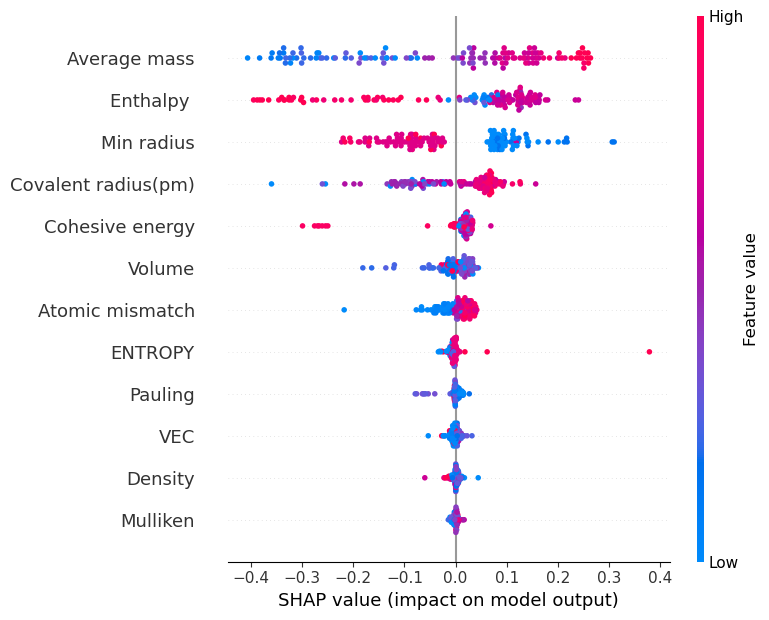

In [6]:
f = plt.figure()
shap.summary_plot(shap_values)
f.savefig('shap1 summary plot after adasyn test set.jpg',dpi=600, bbox_inches='tight')

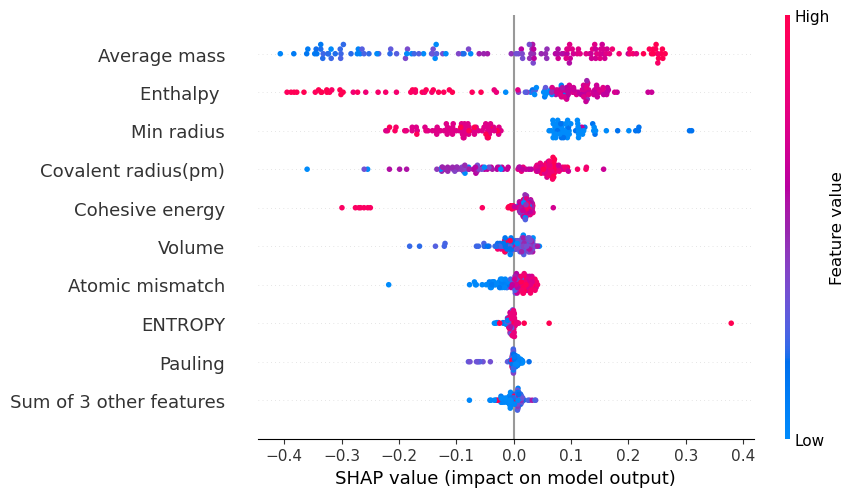

In [7]:
shap.plots.beeswarm(shap_values)

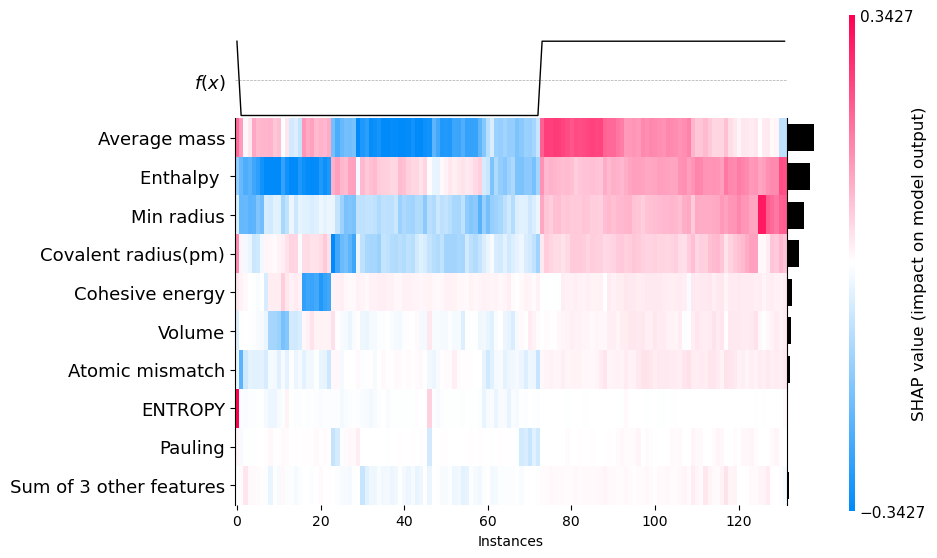

In [8]:
g = plt.figure()
shap.plots.heatmap(shap_values)

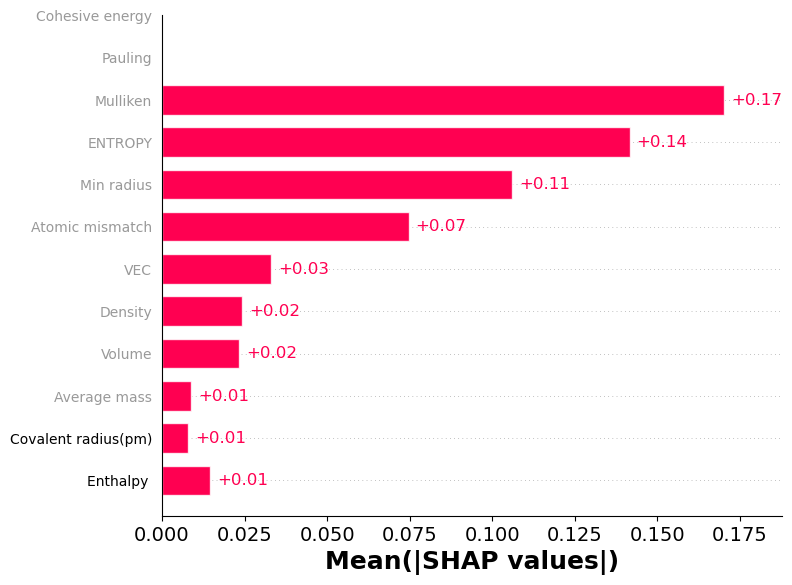

In [9]:
m = plt.figure()
shap.plots.bar(shap_values, show = False)
positions2 = (12,11,10,9,8,7,6, 5, 4, 3, 2, 1)
labels = ("Cohesive energy","Pauling","Mulliken","ENTROPY","Min radius","Atomic mismatch","VEC","Density","Volume","Average mass","Covalent radius(pm)","Enthalpy ")
plt.xlabel('Mean(|SHAP values|)',fontweight='bold',fontsize= 18 )
plt.yticks(positions2, labels, fontsize= 10)
plt.xticks(fontsize= 14)
m.savefig('shap values before adasyn bar plot test set.jpg',dpi=600, bbox_inches='tight')

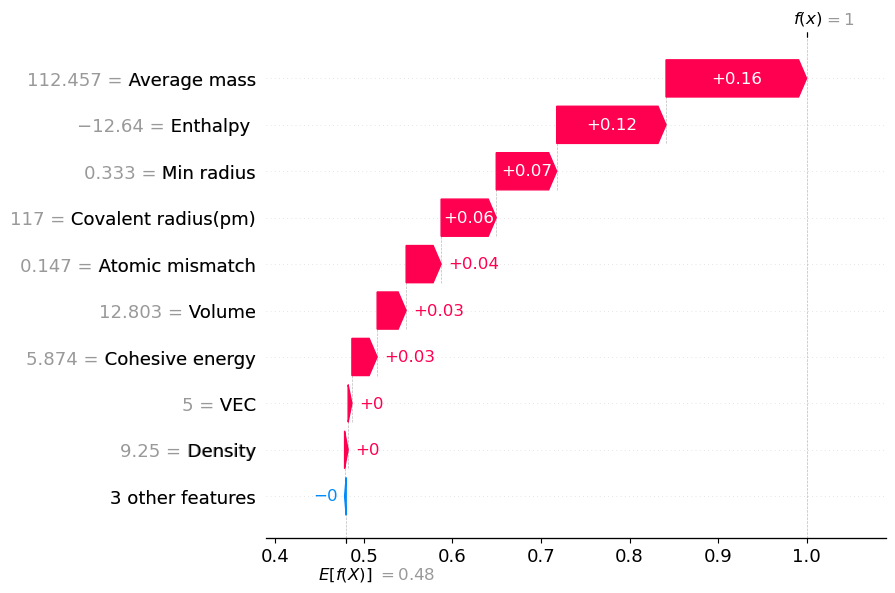

In [10]:
shap.plots.waterfall(shap_values[10])